# Textures

Scene Elements (and agents) can have different textures.
We wil lreview them here.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/usr/local/lib/python3.6/dist-packages/pymunk/libchipmunk.so]


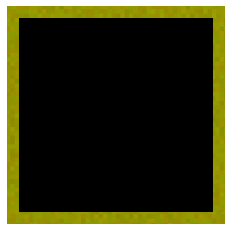

In [2]:
from simple_playgrounds.playgrounds import SingleRoom
from simple_playgrounds import Engine
from simple_playgrounds.entities.texture import *

my_playground = SingleRoom(size=(200, 200))

# we use the option replay=True to reset the environment if it terminates before time_limit.
engine = Engine(time_limit=10000, playground= my_playground, screen=False, replay=False)

plt_image(engine.generate_topdown_image(mode='plt'))

## Color texture

The most basic texture is a uniform color.

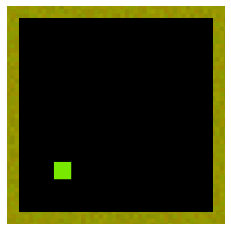

In [3]:
from simple_playgrounds.entities.scene_elements import Basic

elem = Basic([50,50,0], physical_shape = 'square', radius = 10, texture = [123, 234, 0])
my_playground.add_scene_element(elem)

plt_image(engine.generate_topdown_image(mode='plt'))

Note that the texture parameters can be provided as a list/tuple, a dictionary of parameters, or a class.
If a class is provided, it must be instanciated by giving the radius of the element as an additional parameter.

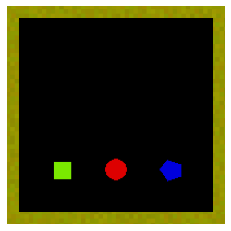

In [4]:
from simple_playgrounds.entities.texture import ColorTexture

elem = Basic([100,50,0], physical_shape = 'circle', radius = 10, texture = ColorTexture(color=(222, 0, 0), radius=10))
my_playground.add_scene_element(elem)

elem = Basic([150,50,0], physical_shape = 'pentagon', radius = 10, texture = {'texture_type': 'color', 'color':(0, 0, 222), 'radius':10})
my_playground.add_scene_element(elem)

plt_image(engine.generate_topdown_image(mode='plt'))

## Advanced Textures

Simple playgrounds includes aready available textures:
- ColorTexture: Unique color across the object
- UniformTexture: Each pixel has a random color.
- RandomTilesTexture: Texture composed of squared tiles
- UniqueRandomTilesTexture: Generate N different RandomTilesTexture
- PolarStripesTexture: Stripes centered
- CenteredRandomTilesTexture: Random stripes centered
- ListCenteredRandomTiles: Stipes come from a list


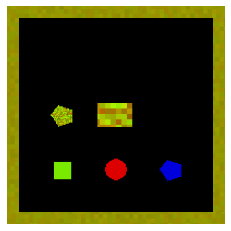

In [5]:
text_uniform = UniformTexture(color_min=(100, 100, 0), color_max=(200, 250, 0), radius = 10)
elem = Basic([50,100,0], physical_shape = 'pentagon', radius = 10, texture = text_uniform)
my_playground.add_scene_element(elem)

text_tiles = RandomTilesTexture(color_min=(150, 100, 0), color_max=(200, 250, 0), size_tiles=5, radius = 40)
elem = Basic([100,100,0], physical_shape = 'rectangle', width_length=(20, 30), texture = text_tiles)
my_playground.add_scene_element(elem)

plt_image(engine.generate_topdown_image(mode='plt'))

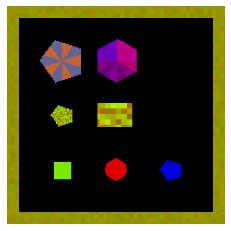

In [6]:
text_polar = PolarStripesTexture(color_1=(200, 100, 50), color_2= (100, 100, 150), radius=20, n_stripes=5)
elem = Basic([50,150,0], physical_shape = 'pentagon', radius = 20, texture = text_polar)
my_playground.add_scene_element(elem)

text_random_tiles_centered = CenteredRandomTilesTexture(color_min=(100, 0, 100), color_max=(200, 0, 200), radius=20, size_tiles=10)
elem = Basic([100,150,0], physical_shape = 'hexagon', radius = 20, texture = text_random_tiles_centered)
my_playground.add_scene_element(elem)

plt_image(engine.generate_topdown_image(mode='plt'))

In [7]:
engine.terminate()